In [67]:
#!pip install pandas-datareader

In [68]:
from pandas_datareader import data as web
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [69]:
#get the Stock symbol from portfolio
#FAANG

assets=['SBIN.NS','RELIANCE.NS','HDFCLIFE.NS','HDFCBANK.NS','TCS.NS']

#assign weight to stocks
#all five stock to add upto=1 and assign equal amount of weights to the stocks
#20% of each of this stock in this portfolio 
weights=np.array([0.2,0.2,0.2,0.2,0.2])

In [70]:
#stock start and end date

stockStartDate='2013-01-01'
today=datetime.today().strftime('%Y-%m-%d')
today

'2021-11-12'

In [71]:
#create dataframe to store adjusted close price
df=pd.DataFrame()
#store adjusted close price of the stock into the datframe
for stock in assets:
    df[stock]=web.DataReader(stock,data_source='yahoo',start=stockStartDate,end=today)['Adj Close']

In [72]:
df

,SBIN.NS,RELIANCE.NS,HDFCLIFE.NS,HDFCBANK.NS,TCS.NS
Date,,,,,
2013-01-01,224.474991,389.052948,NaN,322.921936,528.698608
2013-01-02,226.704514,392.408051,NaN,324.266449,528.343018
2013-01-03,228.651886,398.331543,NaN,322.379425,535.578430
2013-01-04,230.048813,398.840576,NaN,320.492371,543.357300
2013-01-07,228.281815,396.411041,NaN,315.232208,541.538330
...,...,...,...,...,...
2021-11-04,530.450012,2498.850098,696.400024,1593.949951,3508.649902
2021-11-08,523.250000,2501.949951,703.250000,1600.250000,3502.750000
2021-11-09,529.150024,2521.699951,706.450012,1572.250000,3505.699951


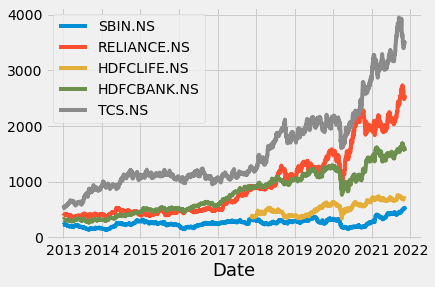

In [73]:
#visually show portfolio
my_stock=df
title='portfolio'
for c in my_stock.columns.values:
    plt.plot(my_stock[c],label=c)
plt.title=title
plt.xlabel('Date',fontsize=18)
plt.legend(my_stock.columns.values,loc='upper left')
plt.show()

In [74]:
#show daily simple return
returns=df.pct_change()
returns

,SBIN.NS,RELIANCE.NS,HDFCLIFE.NS,HDFCBANK.NS,TCS.NS
Date,,,,,
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,0.009932,0.008624,NaN,0.004164,-0.000673
2013-01-03,0.008590,0.015095,NaN,-0.005819,0.013695
2013-01-04,0.006109,0.001278,NaN,-0.005854,0.014524
2013-01-07,-0.007681,-0.006091,NaN,-0.016413,-0.003348
...,...,...,...,...,...
2021-11-04,0.005307,0.006140,0.005922,0.007904,0.004696
2021-11-08,-0.013573,0.001241,0.009836,0.003952,-0.001682
2021-11-09,0.011276,0.007894,0.004550,-0.017497,0.000842


In [75]:
#create and return annulize Covarience Matrix
#diagonal is varience , off diagonals are co-varience
#252 -> number of trading days in Year
cov_matrix_annual=returns.cov()*252
cov_matrix_annual

,SBIN.NS,RELIANCE.NS,HDFCLIFE.NS,HDFCBANK.NS,TCS.NS
SBIN.NS,0.127764,0.037342,0.041647,0.037295,0.010145
RELIANCE.NS,0.037342,0.082912,0.040713,0.028610,0.016567
HDFCLIFE.NS,0.041647,0.040713,0.109542,0.038379,0.020207
HDFCBANK.NS,0.037295,0.028610,0.038379,0.055880,0.011423
TCS.NS,0.010145,0.016567,0.020207,0.011423,0.062158


In [76]:
#portfolio varience
port_variance=np.dot(weights.T,np.dot(cov_matrix_annual,weights))
port_variance

0.040116562928341745

In [77]:
#portfolio volatility aka standard devaition
port_volatility=np.sqrt(port_variance)
port_volatility

0.20029119533404793

In [78]:
#calculate return of annual portfolio
#252 -> number of trading days in Year
portfolioSimpleAnnualReturn=np.sum(returns.mean() * weights) *252
portfolioSimpleAnnualReturn

0.2230949269173683

In [79]:
#Show the expected annual return, volatility (risk), and variance


percent_var= str(round(port_variance, 2) * 100) +  '%'                                                                                                        

percent_vols = str(round(port_volatility, 2) * 100 )+ '%'

percent_ret = str(round (portfolioSimpleAnnualReturn, 2) * 100) + '%'                                                                                                                                                                                                                                                                      

print ('Expected annual return: '+ percent_ret)

print ('Annual volatility /risk: '+ percent_vols)

print ('Annual variance: '+ percent_var)

Expected annual return: 22.0%
Annual volatility /risk: 20.0%
Annual variance: 4.0%


In [80]:
#!pip install PyPortfolioOpt

In [81]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import  expected_returns

In [82]:
#portfolio Optimization

#Calculate the Expected Return and annaualize sample covarience Matrix

mu=expected_returns.mean_historical_return(df)
mu

SBIN.NS        0.099314
RELIANCE.NS    0.242771
HDFCLIFE.NS    0.204430
HDFCBANK.NS    0.198453
TCS.NS         0.243461
dtype: float64

In [83]:
S=risk_models.sample_cov(df)
S

,SBIN.NS,RELIANCE.NS,HDFCLIFE.NS,HDFCBANK.NS,TCS.NS
SBIN.NS,0.127764,0.037342,0.041647,0.037295,0.010145
RELIANCE.NS,0.037342,0.082912,0.040713,0.028610,0.016567
HDFCLIFE.NS,0.041647,0.040713,0.109542,0.038379,0.020207
HDFCBANK.NS,0.037295,0.028610,0.038379,0.055880,0.011423
TCS.NS,0.010145,0.016567,0.020207,0.011423,0.062158


In [84]:
#optimize for Max Sharp Ratio
#Sharp ration : basically to describe how much excess return you receive for some amout of volatility
#it masure performance of investment compare to investment that is risk free

ef=EfficientFrontier(mu,S)
weights = ef.max_sharpe()
weights

OrderedDict([('SBIN.NS', 0.0),
             ('RELIANCE.NS', 0.2384007561147306),
             ('HDFCLIFE.NS', 0.0),
             ('HDFCBANK.NS', 0.2993716401292158),
             ('TCS.NS', 0.4622276037560537)])

In [85]:
cleaned_weights=ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('SBIN.NS', 0.0), ('RELIANCE.NS', 0.2384), ('HDFCLIFE.NS', 0.0), ('HDFCBANK.NS', 0.29937), ('TCS.NS', 0.46223)])
Expected annual return: 23.0%
Annual volatility: 18.4%
Sharpe Ratio: 1.14


(0.22982203787583635, 0.18411242183798304, 1.1396408551970356)

In [86]:
#get discrete allocation of each share per stock
from pypfopt import  DiscreteAllocation,get_latest_prices
latest_prices=get_latest_prices(df)
print(latest_prices)

SBIN.NS         509.600006
RELIANCE.NS    2554.550049
HDFCLIFE.NS     702.599976
HDFCBANK.NS    1548.300049
TCS.NS         3488.199951
Name: 2021-11-11 00:00:00, dtype: float64


In [87]:
weights=cleaned_weights
da=DiscreteAllocation(weights,latest_prices,total_portfolio_value=50000)

allocation,left_over=da.lp_portfolio()


print("Discrete Allocation : ", allocation)
print("Funds Remainning : ",left_over)
# Given the money 50000 to optimize it we can buy  {'RELIANCE.NS': 5, 'HDFCBANK.NS': 10, 'TCS.NS': 6} stock

Discrete Allocation :  {'RELIANCE.NS': 5, 'HDFCBANK.NS': 10, 'TCS.NS': 6}
Funds Remainning :  815.049560546875


In [88]:
#!export CVXOPT_BUILD_GLPK=1
#!pip install cvxopt --no-binary cvxopt